# Regression

In [1]:
import pandas as pd
import numpy as np
import sklearn.preprocessing as preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
# Fit the classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
df = pd.read_csv("train_data.csv")

## concat Test and Train

In [2]:
test = pd.read_csv("test_data.csv")
df = pd.concat([df,test])

In [3]:
df = df.drop("Unnamed: 0", axis = 1)
df

,x-inv,y-inv,force,Id
0,-22.252252,-50.000000,112.929447,NaN
1,28.738739,-49.899900,131.239658,NaN
2,-9.879880,-49.799800,120.853539,NaN
3,15.765766,-49.699700,112.687437,NaN
4,5.975976,-49.599600,132.562004,NaN
...,...,...,...,...
9995,29.837984,49.959996,NaN,9995.0
9996,15.616562,49.969997,NaN,9996.0
9997,24.869487,49.979998,NaN,9997.0
9998,18.310831,49.989999,NaN,9998.0


In [4]:
df.iloc[:,0:2]
df = df.abs()

In [5]:
# df = df.drop("Id", axis = 1)
df
ID = test["Id"]
test = test.drop("Id", axis = 1)
test

,x-inv,y-inv
0,21.995200,-50.000000
1,28.643864,-49.989999
2,-29.369937,-49.979998
3,-12.772277,-49.969997
4,22.367237,-49.959996
...,...,...
9995,29.837984,49.959996
9996,15.616562,49.969997
9997,24.869487,49.979998
9998,18.310831,49.989999


## removing null values

In [6]:
df["force"].fillna(df["force"].mean(), inplace=True)

In [7]:
df.isna().sum()

x-inv       0
y-inv       0
force       0
Id       1000
dtype: int64

In [8]:
(df["x-inv"] == '?').sum()

0

In [9]:
(df["y-inv"] == '?').sum()

0

##  Droping 

In [10]:
df.dropna(inplace = True)

In [11]:
df.isna().sum()

x-inv    0
y-inv    0
force    0
Id       0
dtype: int64

In [12]:
df

,x-inv,y-inv,force,Id
0,21.995200,50.000000,42.963183,0.0
1,28.643864,49.989999,42.963183,1.0
2,29.369937,49.979998,42.963183,2.0
3,12.772277,49.969997,42.963183,3.0
4,22.367237,49.959996,42.963183,4.0
...,...,...,...,...
9995,29.837984,49.959996,42.963183,9995.0
9996,15.616562,49.969997,42.963183,9996.0
9997,24.869487,49.979998,42.963183,9997.0
9998,18.310831,49.989999,42.963183,9998.0


In [13]:
test

,x-inv,y-inv
0,21.995200,-50.000000
1,28.643864,-49.989999
2,-29.369937,-49.979998
3,-12.772277,-49.969997
4,22.367237,-49.959996
...,...,...
9995,29.837984,49.959996
9996,15.616562,49.969997
9997,24.869487,49.979998
9998,18.310831,49.989999


In [14]:
df.index[df.duplicated()]
df.duplicated().sum()

0

In [15]:
# train_df, test_df = train_test_split(df, train_size=0.7)
# x_train = train_df.iloc[:,0:2].values
# y_train = train_df.iloc[:,2:3].values
# x_test = test_df.iloc[:,0:2].values
# y_test = test_df.iloc[:,2:3].values
# y_train

## Train Test set 

In [16]:
x_train = df.iloc[:,0:2].values
y_train = df.iloc[:,2:3].values

In [17]:
x_test = test.iloc[:,0:2].values

In [18]:
# # data standardization with  sklearn
# from sklearn.preprocessing import StandardScaler

# # copy of datasets
# X_train_stand = x_train.copy()
# X_test_stand = x_test.copy()

# # numerical features
# num_cols = 1

# # apply standardization on numerical features
# for i in range(num_cols):
    
#     # fit on training data column
#     scale = StandardScaler().fit(X_train_stand[[i]])
    
#     # transform the training data column
#     X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
#     # transform the testing data column
#     X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [19]:

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
x_train = norm.transform(x_train)

# transform testing dataabs
x_test = norm.transform(x_test)

In [20]:
x_train

array([[0.73314663, 1.        ],
       [0.95479096, 0.99979996],
       [0.9789958 , 0.99959992],
       ...,
       [0.82896579, 0.99959992],
       [0.61032206, 0.99979996],
       [0.72574515, 1.        ]])

In [21]:
y_train =  np.array(y_train)
y_train = y_train.reshape(10000,)
# y_test =  np.array(y_test)
# y_test = y_test.reshape(700,)

In [22]:
x_test

array([[ 0.73314663, -1.00020004],
       [ 0.95479096, -1.        ],
       [-0.97919584, -0.99979996],
       ...,
       [ 0.82896579,  0.99959992],
       [ 0.61032206,  0.99979996],
       [-0.72594519,  1.        ]])

<AxesSubplot:xlabel='y-inv', ylabel='force'>

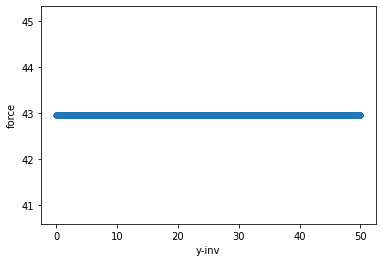

In [23]:
df.plot.scatter(x = "y-inv" , y = "force")

In [24]:
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# x_train = sc_X.fit_transform(x_train)
# x_test = sc_X.transform(x_test)
x_test.dtype

dtype('float64')

Applying logistic regression 

## applying PCA and Logistic regression

In [49]:
# Splitting the data into training and testing data
y_train = y_train.astype('float64')
# y_test = y_test.astype('int')
principal=PCA(n_components=0.99)
principal.fit(x_train)
x_train=principal.transform(x_train)
x_test=principal.transform(x_test)

lreg = LogisticRegression(solver='lbfgs', max_iter=125)
lreg.fit(x_train, y_train)
y_pred = lreg.predict(x_test)
print('Accuracy {:.2f}'.format(lreg.score(x_test, y_test)))

# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score

# # precision tp / (tp + fp)
# precision = precision_score(y_test, y_pred,pos_label='positive'
#                                           , average='micro')
# print('Precision: %f' % precision)

# # recall: tp / (tp + fn)
# recall = recall_score(y_test, y_pred,pos_label='positive',
#                                            average='micro')
# print('Recall: %f' % recall)

# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test, y_pred,pos_label='positive'
#                                           , average='micro')

## applying PCA and NB regression

In [ ]:
# Splitting the data into training and testing data
y_train = y_train.astype('float64')
# y_test = y_test.astype('int')
principal=PCA(n_components=0.99)
principal.fit(x_train)
x_train=principal.transform(x_train)
x_test=principal.transform(x_test)

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
# making predictions on the testing set
y_pred = gnb.predict(x_test)
# from sklearn.metrics import precision_score
# from sklearn.metrics import recall_score
# from sklearn.metrics import f1_score

# # precision tp / (tp + fp)
# precision = precision_score(y_test, y_pred,pos_label='positive'
#                                           , average='micro')
# print('Precision: %f' % precision)

# # recall: tp / (tp + fn)
# recall = recall_score(y_test, y_pred,pos_label='positive',
#                                            average='micro')
# print('Recall: %f' % recall)

# # f1: 2 tp / (2 tp + fp + fn)
# f1 = f1_score(y_test, y_pred,pos_label='positive'
#              a

## applying PCA and SVM regression

In [50]:
# y_test.shape

In [51]:
y_train.shape

(10000,)

In [52]:
x_test.shape

(10000, 2)

In [53]:
print(accuracy_score(y_test, y_pred))

NameError: name 'y_test' is not defined

In [54]:
result = pd.DataFrame({'ID':ID,'Predicted':y_pred})

In [55]:
result.to_csv('predictions2.csv',index=False,header=True)

In [56]:
pd.unique(y_pred)

array([42.])

In [57]:
y_test.shape

NameError: name 'y_test' is not defined

In [58]:
y_test

NameError: name 'y_test' is not defined

In [ ]:
y_pred

In [ ]:
 def my_custom_loss_func(y_true, y_pred):
        diff = np.abs(y_true - y_pred).max()
        return diff
my_custom_loss_func(y_test, Y_Pred)

In [ ]:
df